# Расчётно-графическая работа №1
#### Выполнил: Сухов Николай Михайлович
#### Поток: 24.4
#### Вариант: 1 3

# Задание 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import beta, geom
np.random.seed(17)

Рассмотрим задачу оценивания параметра $\theta$ геометрического распределения:

$$
P(X = x \mid \theta) = \theta (1 - \theta)^x, \quad x = 0, 1, 2, \dots
$$

В качестве априорного распределения выбрано:

$$
\theta \sim \text{Beta}(\alpha, \beta), \quad \pi(\theta) = \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

Функция правдоподобия по выборке $X_1, \dots, X_n$:

$$
L(\theta \mid X) = \prod_{i=1}^{n} \theta (1 - \theta)^{x_i} = \theta^n (1 - \theta)^{\sum x_i}
$$

Апостериорное распределение:

$$
\pi(\theta \mid X) = \frac{L(X \mid \theta) \cdot \pi(\theta)}{\int L(X \mid \theta) \cdot \pi(\theta)d\theta}=\pi(\theta \mid X) = \frac{
\theta^n (1 - \theta)^{\sum x_i} \cdot \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
}{
\displaystyle \int_0^1 \theta^n (1 - \theta)^{\sum x_i} \cdot \frac{\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} \, d\theta
}\textcircled{=}
$$
(Тут мы воспользовались определение Бета-функции)

$$
\textcircled{=}\frac{
\theta^{n + \alpha - 1} (1 - \theta)^{\sum x_i + \beta - 1}
}{
B(n + \alpha, \sum x_i + \beta)
}
$$
Замети так же, что это - плотность Бета-распределения $B(n + \alpha, \sum x_i + \beta)$

Если функция потерь квадратичная:

$$
l(\theta, \hat{\theta}) = (\theta - \hat{\theta})^2
$$

То байесовская оценка — это математическое ожидание апостериорного распределения:

$$
\hat{\theta}_{\text{Bayes}} = \mathbb{E}[\theta \mid X] = \frac{n + \alpha}{\sum x_i + \beta + n}
$$

In [2]:
n_samples = [5, 10, 20, 50, 100, 250, 500, 1000]
M = 1000
a=b=1
theta_est = {n: [] for n in n_samples}
true_theta_values = {n: [] for n in n_samples}
mse_results = {n: [] for n in n_samples}

for n in n_samples:
    for _ in range(M):
        theta = beta.rvs(a=b, b=b)
        true_theta_values[n].append(theta)
        
        sample = geom.rvs(p=theta, size=n) - 1
        
        theta_hat = (n + a) / (np.sum(sample) + b + n)
        theta_est[n].append(theta_hat)
        
        mse = (theta_hat - theta) ** 2
        mse_results[n].append(mse)

Визуализация

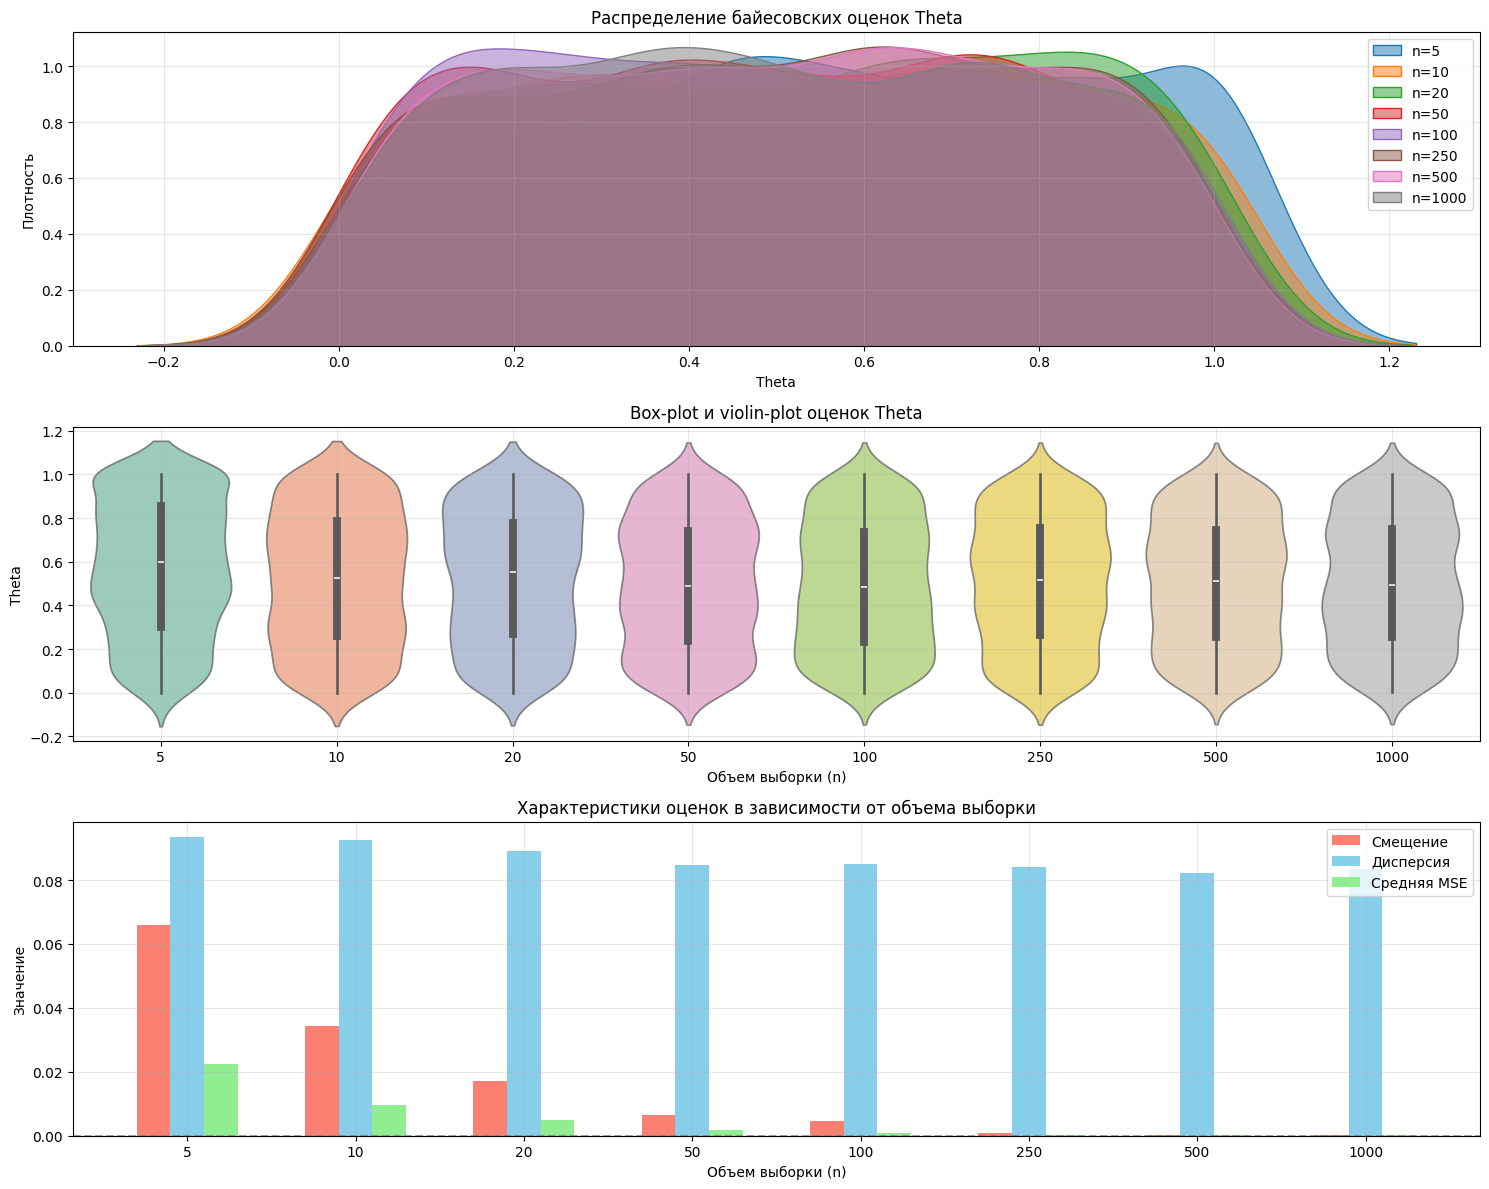

Статистики для оценок Theta:
n      Среднее Theta      Истинное Theta     Смещение     Дисперсия    MSE         
5      0.563995           0.498078           0.065917     0.093635     0.022401    
10     0.517924           0.483696           0.034228     0.092495     0.009460    
20     0.524983           0.507973           0.017009     0.089029     0.004961    
50     0.495213           0.488711           0.006501     0.084850     0.001763    
100    0.493493           0.488846           0.004647     0.084964     0.000867    
250    0.508141           0.507245           0.000897     0.084196     0.000297    
500    0.506368           0.506041           0.000327     0.082184     0.000160    
1000   0.504673           0.504466           0.000207     0.083410     0.000080    


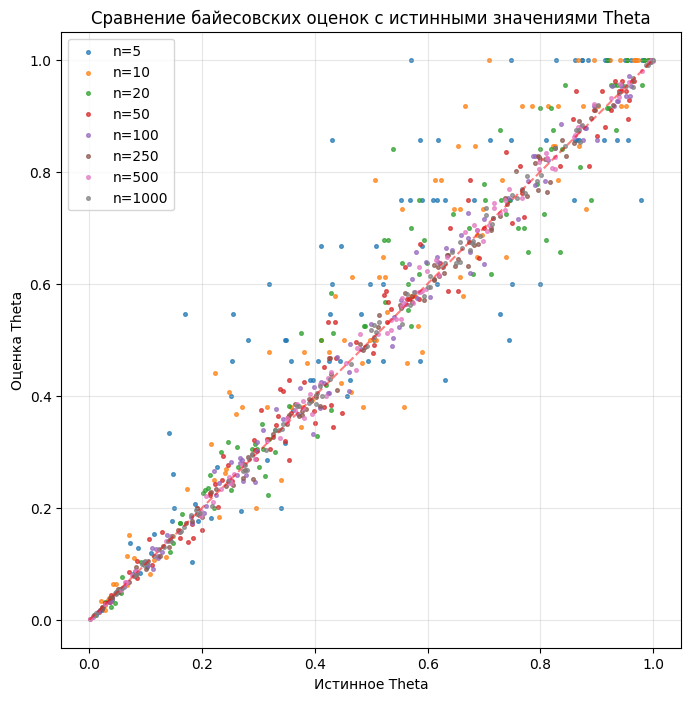

In [3]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)
for i, n in enumerate(n_samples):
    sns.kdeplot(theta_est[n], label=f'n={n}', fill=True, alpha=0.5)
plt.title("Распределение байесовских оценок Theta")
plt.xlabel("Theta")
plt.ylabel("Плотность")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
data_to_plot = [theta_est[n] for n in n_samples]
sns.violinplot(data=data_to_plot, inner="box", palette="Set2", alpha=0.7)
plt.title("Box-plot и violin-plot оценок Theta")
plt.xlabel("Объем выборки (n)")
plt.ylabel("Theta")
plt.xticks(range(len(n_samples)), n_samples)
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
mean_theta_est = [np.mean(theta_est[n]) for n in n_samples]
bias = [np.mean(theta_est[n]) - np.mean(true_theta_values[n]) for n in n_samples]
variance = [np.var(theta_est[n]) for n in n_samples]
mse_mean = [np.mean(mse_results[n]) for n in n_samples]

x = np.arange(len(n_samples))
width = 0.2

plt.bar(x - width, bias, width, label="Смещение", color="salmon")
plt.bar(x, variance, width, label="Дисперсия", color="skyblue")
plt.bar(x + width, mse_mean, width, label="Средняя MSE", color="lightgreen")

plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.title("Характеристики оценок в зависимости от объема выборки")
plt.xlabel("Объем выборки (n)")
plt.ylabel("Значение")
plt.xticks(x, n_samples)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Статистики для оценок Theta:")
print(f"{"n":<6} {"Среднее Theta":<18} {"Истинное Theta":<18} {"Смещение":<12} {"Дисперсия":<12} {"MSE":<12}")
for n in n_samples:
    mean_est = np.mean(theta_est[n])
    mean_true = np.mean(true_theta_values[n])
    bias = mean_est - mean_true
    var = np.var(theta_est[n])
    mse = np.mean(mse_results[n])
    print(f"{n:<6} {mean_est:<18.6f} {mean_true:<18.6f} {bias:<12.6f} {var:<12.6f} {mse:<12.6f}")

plt.figure(figsize=(8, 8))
for i, n in enumerate(n_samples):
    plt.scatter(true_theta_values[n][:100], theta_est[n][:100], alpha=0.7, s=7, label=f"n={n}")

plt.plot([0, 1], [0, 1], "r--", alpha=0.5)
plt.title("Сравнение байесовских оценок с истинными значениями Theta")
plt.xlabel("Истинное Theta")
plt.ylabel("Оценка Theta")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()